
## Lab 2 z Podstaw Uczenia Maszynowego - Klasyfikacja Liniowa
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

#### Importowanie wszystkich potrzebnych bibliotek

In [39]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [65]:
def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1]) * 100), 2)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1]) * 100), 2)

def roc_curve_2(y_test, y_pred):
    tpr_list = [0]
    fpr_list = [0]
    sorted_indices = np.argsort(y_pred)
    y_pred_sorted = y_pred[sorted_indices]
    for i in range(1, len(y_pred) + 1):
        threshold = y_pred_sorted[i - 1]
        TP = np.sum((y_pred >= threshold) & (y_test == 1))
        FP = np.sum((y_pred >= threshold) & (y_test == 0))
        TN = np.sum((y_pred < threshold) & (y_test == 0))
        FN = np.sum((y_pred < threshold) & (y_test == 1))
        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

X: 2597, y: 2597


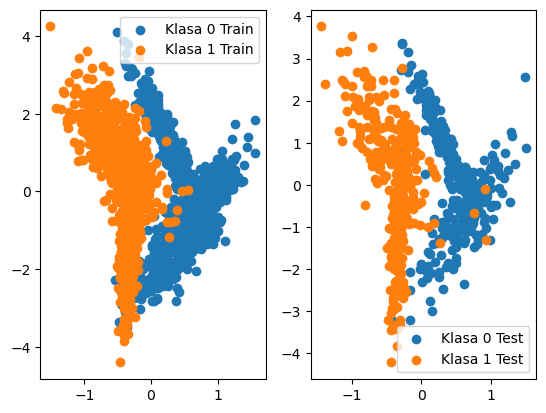

In [41]:
X, t = make_classification(n_samples=2597, n_features=4, n_classes=2, random_state=254397)
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.25)


klasa_0_X = X_train[(y_train == 0)]
klasa_1_X = X_train[(y_train == 1)]
test_0_X = X_test[(y_test == 0)]
test_1_X = X_test[(y_test == 1)]



print(f'X: {len(X)}, y: {len(t)}')
plt.subplot(1, 2, 1)
plt.scatter(klasa_0_X[:,2], klasa_0_X[:,3], label='Klasa 0 Train')
plt.scatter(klasa_1_X[:,2], klasa_1_X[:,3], label='Klasa 1 Train')
# plt.scatter(X[:,0], t)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,2], test_0_X[:,3], label='Klasa 0 Test')
plt.scatter(test_1_X[:,2], test_1_X[:,3], label='Klasa 1 Test')
plt.legend()



Czas metody analitycznej Ridge: 0.0 s
[[310  38]
 [ 13 289]]
Czulosc: 89.08%
Swoistosc: 95.7%


Text(0, 0.5, 'TPR')

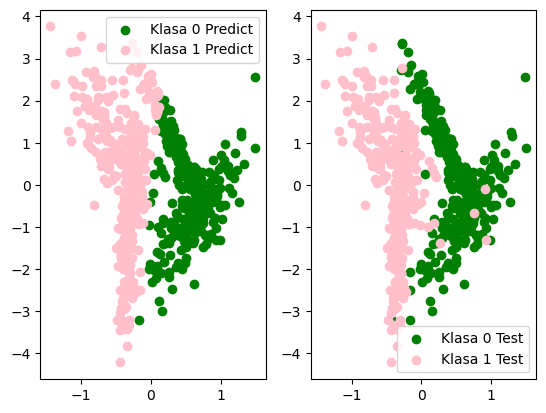

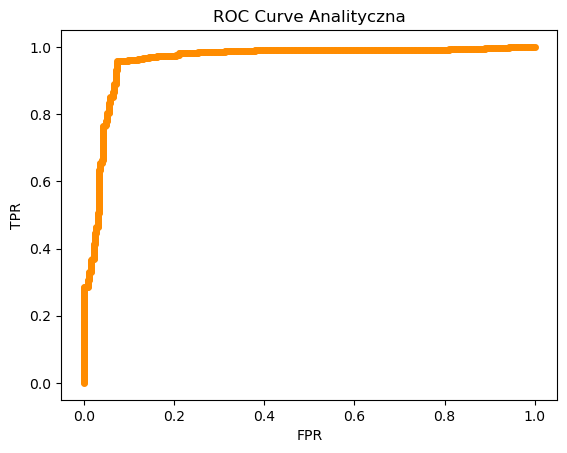

In [66]:
start = time.time()

lambda_16 = 0.001
I = np.ones_like((X_train.T @ X_train))


theta = np.linalg.inv(X_train.T @ X_train + lambda_16 * I) @ X_train.T @ y_train
y_pred_a = X_test @ theta
end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')

y_pred_2 = [1 if yp > 0 else 0 for yp in y_pred_a]

X_pred_0 = X_test[y_pred_a < 0]
X_pred_1 = X_test[y_pred_a > 0]
# print(t)
# print(y_pred)

TP = sum([1 if tp == 1 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred_2)])
FN = sum([1 if tp == 0 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred_2)])
FP = sum([1 if tp == 1 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred_2)])
TN = sum([1 if tp == 0 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred_2)])
macierz_pomylek = np.array([[TP, FN], [FP, TN]])
print(macierz_pomylek)
print(f'Czulosc: {sensitivity(macierz_pomylek)}%\nSwoistosc: {specificity(macierz_pomylek)}%')



plt.subplot(1, 2, 1)
plt.scatter(X_pred_0[:,2], X_pred_0[:,3], label='Klasa 0 Predict', marker='o', color='green')
plt.scatter(X_pred_1[:,2], X_pred_1[:,3], label='Klasa 1 Predict', marker='o', color = 'pink')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,2], test_0_X[:,3], label='Klasa 0 Test', marker='o', color='green')
plt.scatter(test_1_X[:,2], test_1_X[:,3], label='Klasa 1 Test', marker='o', color = 'pink')
plt.legend()

tpr_a, fpr_a = roc_curve_2(y_test, y_pred_a)
plt.figure()
plt.scatter(fpr_a, tpr_a, color='darkorange', lw=2, label='Analityczna', marker='.')
plt.title('ROC Curve Analityczna')
plt.xlabel('FPR')
plt.ylabel('TPR')

Czas metody analitycznej Ridge: 0.0019931793212890625 s
[[311  23]
 [ 12 304]]
Czulosc: 93.11%
Swoistosc: 96.2%


Text(0.5, 1.0, 'ROC Curve Sklearn')

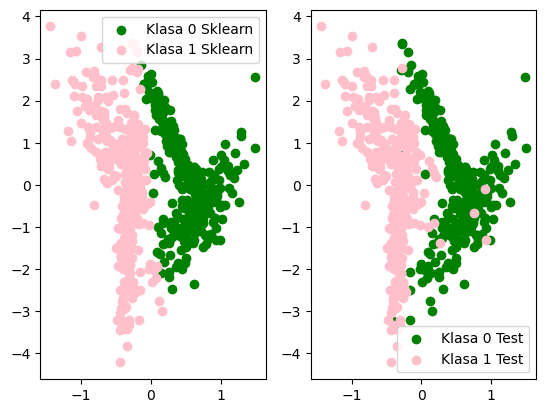

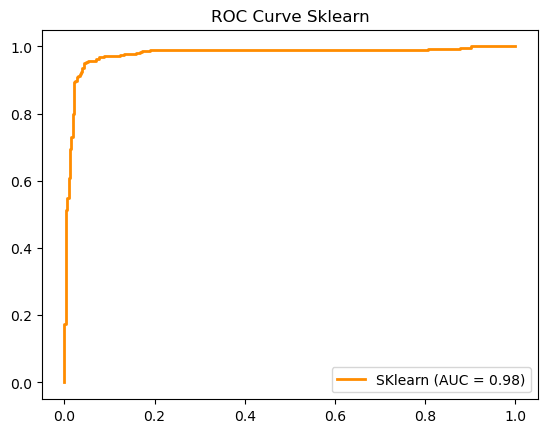

In [43]:
start = time.time()
r_classifier = RidgeClassifier(alpha=0.000001)
r_classifier.fit(X_train, y_train)
y_pred_sklearn = r_classifier.predict(X_test)
end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')

# print(y_pred_sklearn)
X_pred_0_sklearn = X_test[y_pred_sklearn == 0]
X_pred_1_sklearn = X_test[y_pred_sklearn == 1]



TP_s = sum([1 if tp == 1 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred_sklearn)])
FN_s = sum([1 if tp == 0 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred_sklearn)])
FP_s = sum([1 if tp == 1 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred_sklearn)])
TN_s = sum([1 if tp == 0 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred_sklearn)])
macierz_pomylek_sklearn = np.array([[TP_s, FN_s], [FP_s, TN_s]])
print(macierz_pomylek_sklearn)
sensitivity_sklearn = sensitivity(macierz_pomylek_sklearn)
specificity_sklearn = specificity(macierz_pomylek_sklearn)
print(f'Czulosc: {sensitivity_sklearn}%\nSwoistosc: {specificity_sklearn}%')


plt.subplot(1, 2, 1)
plt.scatter(X_pred_0_sklearn[:,2], X_pred_0_sklearn[:,3], label='Klasa 0 Sklearn', marker='o', color='green')
plt.scatter(X_pred_1_sklearn[:,2], X_pred_1_sklearn[:,3], label='Klasa 1 Sklearn', marker='o', color = 'pink')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,2], test_0_X[:,3], label='Klasa 0 Test', marker='o', color='green')
plt.scatter(test_1_X[:,2], test_1_X[:,3], label='Klasa 1 Test', marker='o', color = 'pink')
plt.legend()


y_scores = r_classifier.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SKlearn (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('ROC Curve Sklearn')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [44]:
#Missing values: ca, thal
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

heart_cleveland = pd.read_csv('HeartCleveland.csv', names=column_names, na_values='?')

missing_values_count = heart_cleveland.isnull().sum()
print(f'Brakujace wartosci:\n{missing_values_count}')

heart_cleveland = heart_cleveland.dropna()
missing_values_count = heart_cleveland.isnull().sum()
print(f'Brakujace wartosci po usunieciu:\n{missing_values_count}')

average = []
minimum = []
maximum = []
std_deviation = []
integer_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for column in column_names[:-1]:

    if column not in integer_columns:
        print(f'Kolumna {column} jest kategoryczna')
        average.append(statistics.mode(heart_cleveland[column].values))
    else:
        print(f'Kolumna {column.title()} jest ciagla')
        average.append(sum(heart_cleveland[column].values)/len(heart_cleveland[column]))

    minimum.append(min(heart_cleveland[column].values))
    maximum.append(max(heart_cleveland[column].values))
    std_deviation.append((heart_cleveland[column].values).std())

    # plt.figure()
    # plt.hist(heart_cleveland[column], bins=10, color='blue', edgecolor='black')
    # plt.title(column)


print(f'Srednia/dominanta: {average}\nMinimum: {minimum}\nMaksimum: {maximum}\nOdchylenie standardowe: {std_deviation}')

Brakujace wartosci:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Brakujace wartosci po usunieciu:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Kolumna Age jest ciagla
Kolumna sex jest kategoryczna
Kolumna cp jest kategoryczna
Kolumna Trestbps jest ciagla
Kolumna Chol jest ciagla
Kolumna fbs jest kategoryczna
Kolumna restecg jest kategoryczna
Kolumna Thalach jest ciagla
Kolumna exang jest kategoryczna
Kolumna Oldpeak jest ciagla
Kolumna slope jest kategoryczna
Kolumna Ca jest ciagla
Kolumna thal jest kategoryczna
Srednia/dominanta: [54.54208754208754, 1.0, 4.0, 131.69360269360268, 247.35016835016836, 0.0, 0.0, 149.5993265993266, 0.0, 1.0555555555555558, 1.0, 0.6767

In [45]:
correlation_matrix = heart_cleveland.corr()
print(f'Macierz korelacji: \n{correlation_matrix}')
# thalach(0.42), oldpeak(0.5), ca(0.52), thal(0.51)

Macierz korelacji: 
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.13

In [46]:
chosen_columns = ['thalach', 'oldpeak', 'ca', 'thal']
X = np.array(heart_cleveland[chosen_columns].values)
y = np.array(heart_cleveland.iloc[:, -1].values)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

In [47]:
min_val = np.min(X_train_2, axis=0)
max_val = np.max(X_train_2, axis=0)
X_train_2 = (X_train_2 - min_val) / (max_val - min_val)

min_val = np.min(X_test_2, axis=0)
max_val = np.max(X_test_2, axis=0)
X_test_2 = (X_test_2 - min_val) / (max_val - min_val)

min_val = np.min(y_train_2, axis=0)
max_val = np.max(y_train_2, axis=0)
y_train_2 = (y_train_2 - min_val) / (max_val - min_val)

Czas metody analitycznej Ridge: 0.0 s
Dokladnosc metody analitycznej: 55.0%


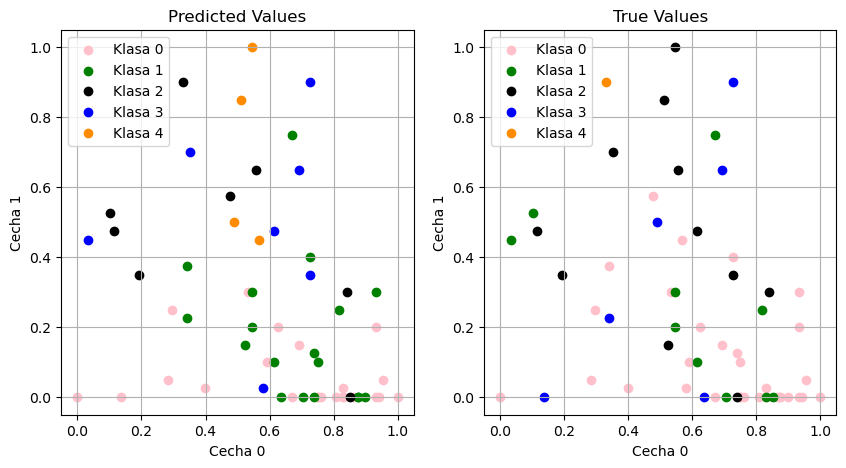

In [48]:
start = time.time()
lambda_2 = 0.001
I = np.ones_like((X_train_2.T @ X_train_2))
theta = np.linalg.inv(X_train_2.T @ X_train_2 + lambda_16 * I) @ X_train_2.T @ y_train_2
y_pred_2 = X_test_2 @ theta
end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')

# y_pred_2_4 = np.array([0 if y_p <= 0.5 else (1 if y_p > 0.5 and y_p <= 1.5 else (2 if y_p > 1.5 and y_p <= 2.5 else (3 if y_p > 2.5 and y_p <= 3.5 else 4))) for y_p in y_pred_2])
y_pred_2_4 = np.array([0 if y_p <= 0.2 else (1 if y_p > 0.2 and y_p <= 0.4 else (2 if y_p > 0.4 and y_p <= 0.6 else (3 if y_p > 0.6 and y_p <= 0.8 else 4))) for y_p in y_pred_2])

feature = [0, 1]
colors = ['pink', 'green', 'black', 'blue', 'darkorange']
labels = ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3', 'Klasa 4']


plt.figure(figsize=(10, 5))
for i in range(0, 5):
    plt.subplot(1, 2, 1)
    X_plot = X_test_2[y_pred_2_4 == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('Predicted Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

plt.subplot(1, 2, 2)
for i in range(0, 5):
    X_plot = X_test_2[y_test_2 == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('True Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

accuracy = round((sum([1 if tp == yp else 0 for (tp, yp) in zip(y_test_2, y_pred_2_4)])/len(y_test_2) * 100), 2)
print(f'Dokladnosc metody analitycznej: {accuracy}%')